**Expected inputs (generated by `src/pipeline.py`):**
- data/outputs/boundary_metadata.json
- data/processed/landuse.gpkg
- data/processed/pois.gpkg
- data/processed/poi_grid.gpkg
- data/processed/buildings.gpkg
- data/processed/building_grid.gpkg
- data/processed/street_edges.gpkg
- data/processed/street_nodes.gpkg
- data/processed/street_network.graphml
- data/outputs/landuse_summary.csv
- data/outputs/poi_summary.csv
- data/outputs/poi_grid_summary.csv
- data/outputs/building_summary.csv
- data/outputs/building_density.png

In [24]:
from pathlib import Path
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox

DATA = Path('..') / 'data'
OUTPUTS = DATA / 'outputs'
PROCESSED = DATA / 'processed'
OSM_ID = 'R5167559'  # Córdoba
PROJECTED_CRS = 32720

In [25]:
# Load boundary from OSM (fresh)
boundary = ox.geocode_to_gdf(OSM_ID, by_osmid=True).to_crs(4326)
boundary.shape, boundary.crs

((1, 17),
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [26]:
# Load metadata (if present)
meta_path = OUTPUTS / 'boundary_metadata.json'
if meta_path.exists():
    with meta_path.open() as f:
        meta = json.load(f)
    meta
else:
    print('boundary_metadata.json not found; run pipeline first')

In [27]:
# Load layers (skip if missing)
paths = {
    'landuse': PROCESSED / 'landuse.gpkg',
    'pois': PROCESSED / 'pois.gpkg',
    'grid': PROCESSED / 'poi_grid.gpkg',
    'buildings': PROCESSED / 'buildings.gpkg',
    'building_grid': PROCESSED / 'building_grid.gpkg',
    'street_edges': PROCESSED / 'street_edges.gpkg',
    'street_nodes': PROCESSED / 'street_nodes.gpkg',
    'landuse_summary': OUTPUTS / 'landuse_summary.csv',
    'poi_summary': OUTPUTS / 'poi_summary.csv',
    'poi_grid_summary': OUTPUTS / 'poi_grid_summary.csv',
    'building_summary': OUTPUTS / 'building_summary.csv',
}

landuse = gpd.read_file(paths['landuse']) if paths['landuse'].exists() else gpd.GeoDataFrame()
pois = gpd.read_file(paths['pois']) if paths['pois'].exists() else gpd.GeoDataFrame()
grid = gpd.read_file(paths['grid']) if paths['grid'].exists() else gpd.GeoDataFrame()
buildings = gpd.read_file(paths['buildings']) if paths['buildings'].exists() else gpd.GeoDataFrame()
building_grid = gpd.read_file(paths['building_grid']) if paths['building_grid'].exists() else gpd.GeoDataFrame()
street_edges = gpd.read_file(paths['street_edges']) if paths['street_edges'].exists() else gpd.GeoDataFrame()
street_nodes = gpd.read_file(paths['street_nodes']) if paths['street_nodes'].exists() else gpd.GeoDataFrame()

landuse_summary = pd.read_csv(paths['landuse_summary']) if paths['landuse_summary'].exists() else pd.DataFrame()
poi_summary = pd.read_csv(paths['poi_summary']) if paths['poi_summary'].exists() else pd.DataFrame()
poi_grid_summary = pd.read_csv(paths['poi_grid_summary']) if paths['poi_grid_summary'].exists() else pd.DataFrame()
building_summary = pd.read_csv(paths['building_summary']) if paths['building_summary'].exists() else pd.DataFrame()

print('landuse', landuse.shape)
print('pois', pois.shape)
print('grid', grid.shape)
print('buildings', buildings.shape)
print('building_grid', building_grid.shape)
print('street_edges', street_edges.shape)

landuse (2891, 110)
pois (332, 5)
grid (2400, 22)
buildings (16239, 14)
building_grid (2400, 26)
street_edges (115316, 20)


In [28]:
# Quick summaries
display(landuse_summary.head())
display(poi_summary.head())
display(poi_grid_summary.head())
display(building_summary.head())

,category,area_km2
0,landuse:residential,193.885024
1,landuse:military,33.152303
2,landuse:farmland,30.720517
3,landuse:industrial,25.148737
4,natural:heath,23.723359


,category,count,density_per_km2
0,amenity:pharmacy,160,0.277995
1,amenity:school,145,0.251933
2,amenity:hospital,22,0.038224
3,leisure:park,5,0.008687


,cell_id,area_km2,count,density_per_km2
0,0,0.105460,0,0.0
1,1,0.109353,0,0.0
2,2,0.112844,0,0.0
3,3,0.116334,0,0.0
4,4,0.119824,0,0.0


,cell_id,area_km2,building_count,building_area_km2,building_density,footprint_coverage
0,0,0.105460,0,0.0,0.0,0.0
1,1,0.109353,0,0.0,0.0,0.0
2,2,0.112844,0,0.0,0.0,0.0
3,3,0.116334,0,0.0,0.0,0.0
4,4,0.119824,0,0.0,0.0,0.0


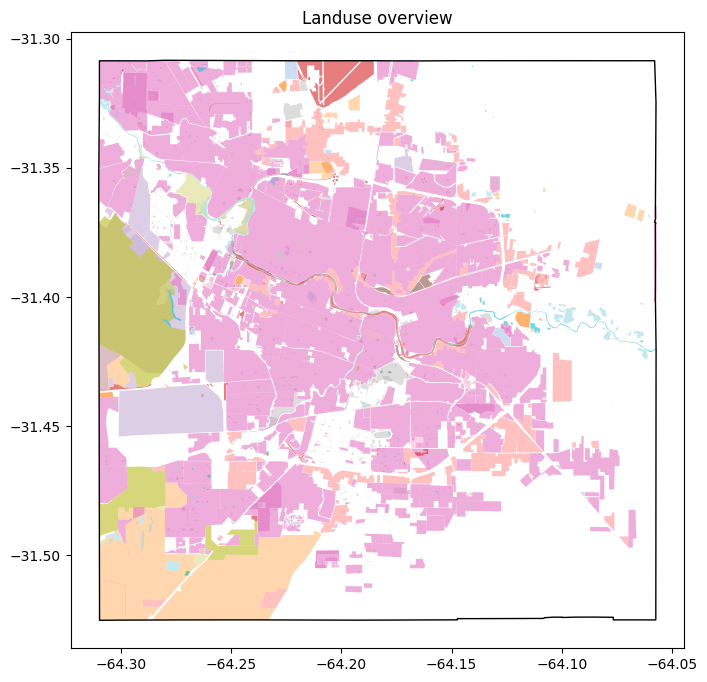

In [29]:
# Plot landuse
if not landuse.empty:
    fig, ax = plt.subplots(figsize=(8, 8))
    landuse.to_crs(4326).plot(column='category', ax=ax, legend=False, alpha=0.6, cmap='tab20')
    boundary.boundary.plot(ax=ax, color='black', linewidth=1)
    plt.title('Landuse overview')
else:
    print('Landuse layer not found; run pipeline first')

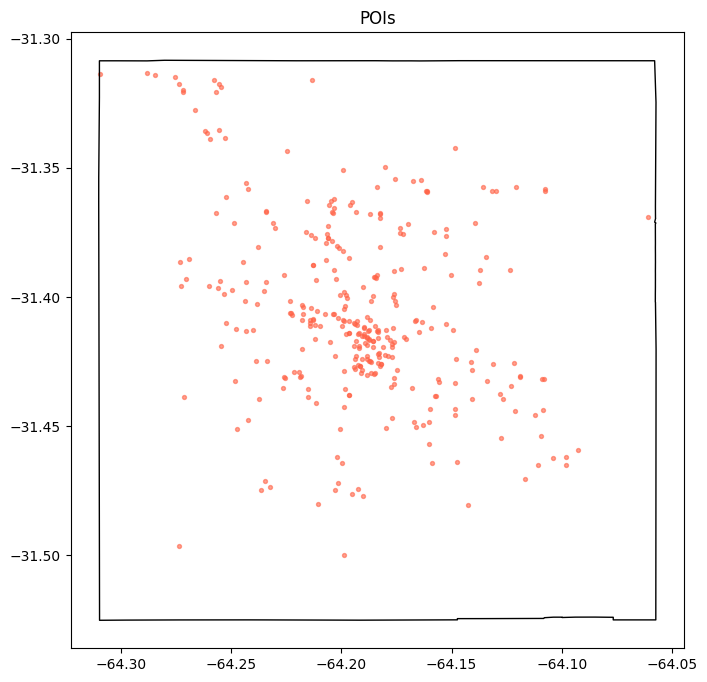

In [30]:
# Plot POIs
if not pois.empty:
    fig, ax = plt.subplots(figsize=(8, 8))
    pois.to_crs(4326).plot(ax=ax, color='tomato', markersize=8, alpha=0.6)
    boundary.boundary.plot(ax=ax, color='black', linewidth=1)
    plt.title('POIs')
else:
    print('POIs layer not found; run pipeline first')

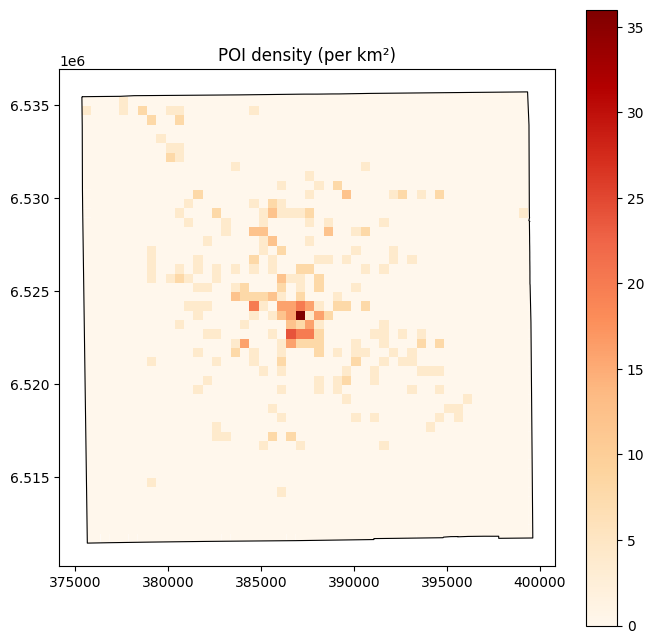

In [31]:
# Plot grid density
if not grid.empty:
    fig, ax = plt.subplots(figsize=(8, 8))
    grid.plot(column='density_per_km2', cmap='OrRd', legend=True, ax=ax, edgecolor='none')
    boundary.to_crs(grid.crs).boundary.plot(ax=ax, color='black', linewidth=0.8)
    plt.title('POI density (per km²)')
else:
    print('POI grid layer not found; run pipeline first')

Fetching street network (this may take a moment)...
Graph loaded: 37031 nodes, 115316 edges
Edges CRS: epsg:4326, Grid CRS: EPSG:32720
Plot complete - you should see streets (gray), density grid (yellow-red), and boundary (black)


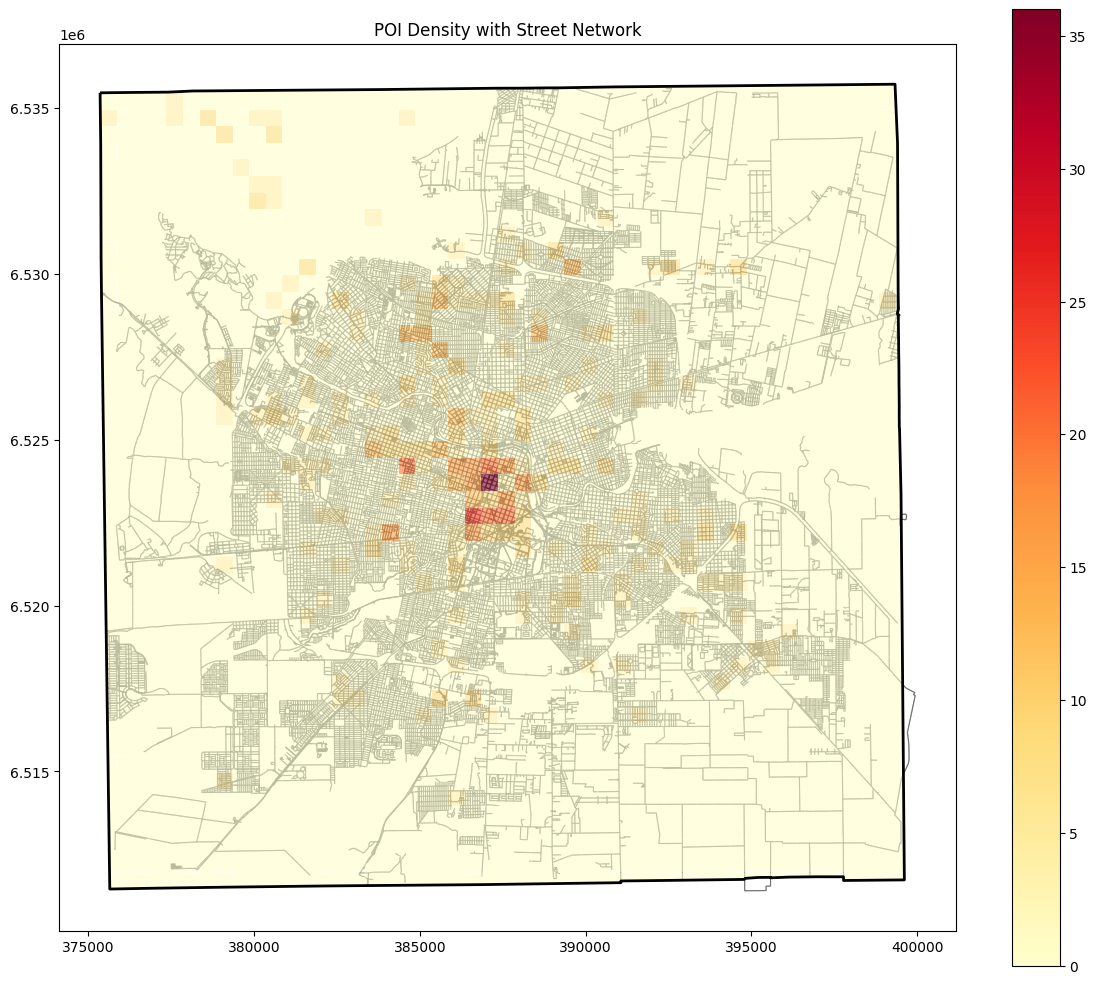

In [32]:
# Fetch street network and plot grid density with streets
if not grid.empty:
    print('Fetching street network (this may take a moment)...')
    poly = boundary.geometry.values[0]
    G = ox.graph_from_polygon(poly, network_type='walk')
    print(f'Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges')
    
    # Convert graph to GeoDataFrame edges
    edges = ox.graph_to_gdfs(G, nodes=False)
    print(f'Edges CRS: {edges.crs}, Grid CRS: {grid.crs}')
    
    # Ensure both are in the same CRS (use grid CRS)
    edges_proj = edges.to_crs(grid.crs)
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # 1. Street network background (darker, visible)
    edges_proj.plot(ax=ax, color='#555555', linewidth=0.8, zorder=1, alpha=0.6)
    
    # 2. Grid density overlay (semi-transparent)
    grid.plot(column='density_per_km2', cmap='YlOrRd', legend=True, ax=ax, 
              edgecolor='white', linewidth=0.1, alpha=0.6, zorder=2)
    
    # 3. Boundary outline (on top)
    boundary.to_crs(grid.crs).boundary.plot(ax=ax, color='black', linewidth=2, zorder=3)
    
    plt.title('POI Density with Street Network')
    plt.tight_layout()
    print('Plot complete - you should see streets (gray), density grid (yellow-red), and boundary (black)')
else:
    print('Grid layer not found; run pipeline first')

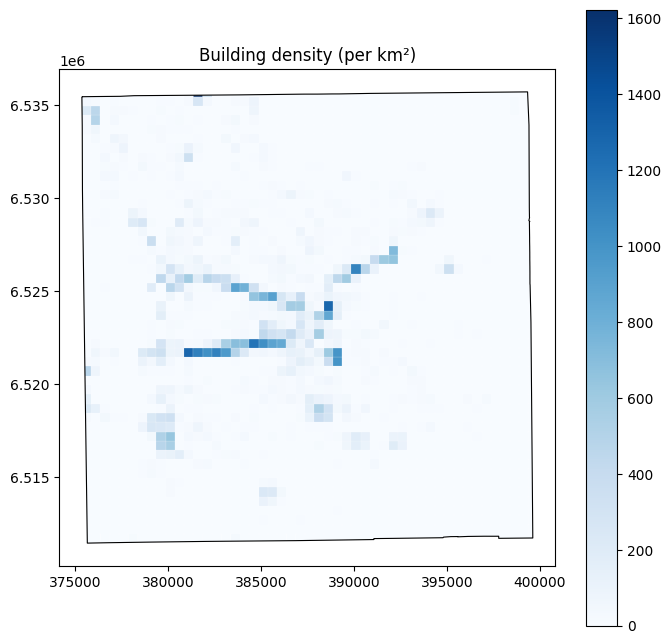

In [33]:
# Plot building density
if not building_grid.empty:
    fig, ax = plt.subplots(figsize=(8, 8))
    building_grid.plot(column='building_density', cmap='Blues', legend=True, ax=ax,
                       edgecolor='white', linewidth=0.1)
    boundary.to_crs(building_grid.crs).boundary.plot(ax=ax, color='black', linewidth=0.8)
    plt.title('Building density (per km²)')
else:
    print('Building grid layer not found; run pipeline first')

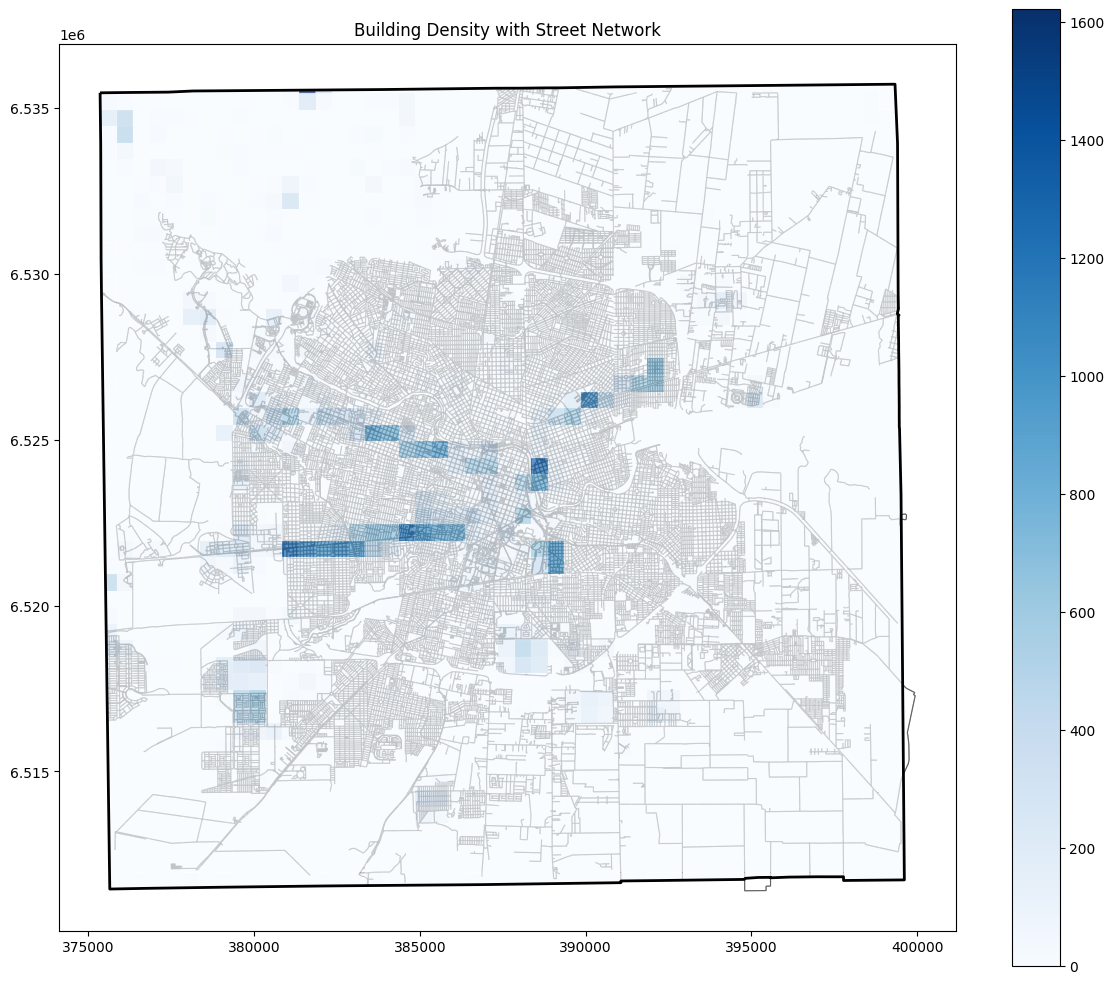

In [34]:
# Plot building density with street network overlay
if not building_grid.empty and not street_edges.empty:
    # Align CRS
    edges_proj = street_edges.to_crs(building_grid.crs)
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Streets background
    edges_proj.plot(ax=ax, color='#444444', linewidth=0.8, alpha=0.6, zorder=1)
    
    # Building density grid
    building_grid.plot(column='building_density', cmap='Blues', legend=True, ax=ax,
                       edgecolor='white', linewidth=0.1, alpha=0.7, zorder=2)
    
    # Boundary outline
    boundary.to_crs(building_grid.crs).boundary.plot(ax=ax, color='black', linewidth=2, zorder=3)
    
    plt.title('Building Density with Street Network')
    plt.tight_layout()
else:
    print('Building grid or street edges missing; run pipeline first')